<h1><b>PHASE 3 - MODEL TRAINING AND TESTING.</b></h1>
<hr/>

<h4><b>Phase Objective</b></h4>
<hr/>
<p>The objective of this phase is to produce a trained model that satisfy the desired results.</p>

In [1]:
#import necessary libraried for visualization

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<h3><em>Heart Data</em></h3>

In [2]:
#Load dataset
heart_data = pd.read_csv('heart.csv')
heart_df = heart_data.copy()

In [3]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
#select dependent and independent variables
x = heart_df.drop('target', axis = 1)
y = heart_df.target

In [5]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, random_state=47)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_xtrain = scaler.fit_transform(xtrain)
new_xtest = scaler.transform(xtest)

In [7]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier

tree_model=DecisionTreeClassifier(random_state=42, max_depth=6)
tree_model.fit(new_xtrain,ytrain)
y_pred=tree_model.predict(new_xtest)

In [8]:
#SVM
from sklearn.svm import SVC

svm=SVC()
svm.fit(new_xtrain,ytrain)
y_pred2=svm.predict(new_xtest)

In [9]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()
rf_model.fit(new_xtrain,ytrain)
y_pred3=rf_model.predict(new_xtest)

Decision Tree Classifier Prediction details: 

Accuracy Score  : 0.9317073170731708
Precision Score : 0.8962264150943396
Recall Score    : 0.9693877551020408
  f1 Score      : 0.9313725490196079
Confusion Matrix:
 [[96 11]
 [ 3 95]]
Classification Matrix :
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       107
           1       0.90      0.97      0.93        98

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



<Axes: >

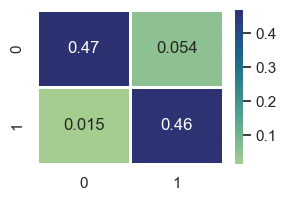

In [10]:
#Accuracy of Decision Tree Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

print("Decision Tree Classifier Prediction details: \n")
print("Accuracy Score  :",accuracy_score(ytest,y_pred))
print("Precision Score :",precision_score(ytest,y_pred))
print("Recall Score    :",recall_score(ytest,y_pred))
print("  f1 Score      :",f1_score(ytest,y_pred))
print("Confusion Matrix:\n",confusion_matrix(ytest,y_pred))
print("Classification Matrix :\n",classification_report(ytest,y_pred))

tree_revealer = confusion_matrix(ytest,y_pred)
plt.figure(figsize = (3,2))
sns.set(style = 'darkgrid')
sns.heatmap(tree_revealer/np.sum(tree_revealer), annot=True, cmap='crest', linewidth=1)

SVC Prediction details 

Accuracy Score  : 0.8975609756097561
Precision Score : 0.8598130841121495
Recall Score    : 0.9387755102040817
  f1 Score      : 0.8975609756097561
Confusion Matrix:
 [[92 15]
 [ 6 92]]
Classification Matrix :
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       107
           1       0.86      0.94      0.90        98

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



<Axes: >

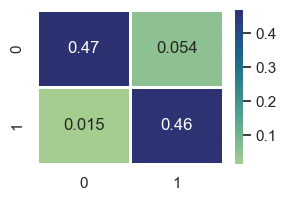

In [11]:
#Accuracy of SVC

print("SVC Prediction details \n")
print("Accuracy Score  :",accuracy_score(ytest,y_pred2))
print("Precision Score :",precision_score(ytest,y_pred2))
print("Recall Score    :",recall_score(ytest,y_pred2))
print("  f1 Score      :",f1_score(ytest,y_pred2))
print("Confusion Matrix:\n",confusion_matrix(ytest,y_pred2))
print("Classification Matrix :\n",classification_report(ytest,y_pred2))

svc_revealer = confusion_matrix(ytest,y_pred2)
plt.figure(figsize = (3,2))
sns.set(style = 'darkgrid')
sns.heatmap(tree_revealer/np.sum(tree_revealer), annot=True, cmap='crest', linewidth=1)

Random Forest Classifier Prediction details 

Accuracy Score  : 1.0
Precision Score : 1.0
Recall Score    : 1.0
  f1 Score      : 1.0
Confusion Matrix:
 [[107   0]
 [  0  98]]
Classification Matrix :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        98

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



<Axes: >

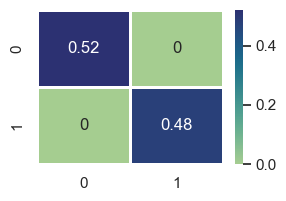

In [12]:
#Accuracy of Random Forest Classifier

print("Random Forest Classifier Prediction details \n")
print("Accuracy Score  :",accuracy_score(ytest,y_pred3))
print("Precision Score :",precision_score(ytest,y_pred3))
print("Recall Score    :",recall_score(ytest,y_pred3))
print("  f1 Score      :",f1_score(ytest,y_pred3))
print("Confusion Matrix:\n",confusion_matrix(ytest,y_pred3))
print("Classification Matrix :\n",classification_report(ytest,y_pred3))

rf_revealer = confusion_matrix(ytest,y_pred3)
plt.figure(figsize = (3,2))
sns.set(style = 'darkgrid')
sns.heatmap(rf_revealer/np.sum(rf_revealer), annot=True, cmap='crest', linewidth=1)

In [13]:
result=pd.DataFrame({'Model':['Decision Tree Classifier','SVC','Random Forest Classifier'],
                     'Accuracy':[recall_score(y_pred,ytest)*100,recall_score(y_pred2,ytest)*100,recall_score(ytest,y_pred3)*100]})

In [14]:
result

,Model,Accuracy
0,Decision Tree Classifier,89.622642
1,SVC,85.981308
2,Random Forest Classifier,100.000000


<br/>
<br/>


<br/>.
<br/>
<h3><em>Stroke Data</em></h3>
<hr/>

In [15]:
stroke_feature = pd.read_csv('stroke_feature.csv')

In [16]:
stroke_feature.drop('Unnamed: 0', axis = 1, inplace = True)

In [17]:
#....................Under Sampling........................
tempdf = stroke_feature.loc[stroke_feature.stroke == 0]
tempdf = stroke_feature.sample(2000)
feature = pd.concat([tempdf, stroke_feature.loc[stroke_feature.stroke == 1]], axis=0)
feature.reset_index(drop=True, inplace = True)
feature

,age,hypertension,heart_disease,bmi,stroke,avg_glucose_level
0,-0.401037,0,0,-1.212872,0,0.163345
1,0.483574,0,0,0.334089,0,-0.538474
2,1.058571,0,0,0.385228,0,-0.826336
3,0.395113,0,0,1.152316,0,-0.959834
4,-1.816414,0,0,-1.442998,0,-0.056534
...,...,...,...,...,...,...
2160,0.616265,0,0,0.998899,1,-0.459497
2161,-1.285648,0,0,0.257380,1,-1.065960
2162,1.412415,0,0,0.052824,1,-0.597706
2163,1.235493,1,0,-0.100594,1,-0.395777


In [18]:
#split into train and test

from sklearn.model_selection import train_test_split
stroke_x = feature.drop('stroke',axis = 1)
stroke_y = feature.stroke

stroke_xtrain,stroke_xtest,stroke_ytrain,stroke_ytest = train_test_split(stroke_x, stroke_y, test_size = 0.20, random_state = 42,stratify=stroke_y)

<Axes: xlabel='stroke', ylabel='count'>

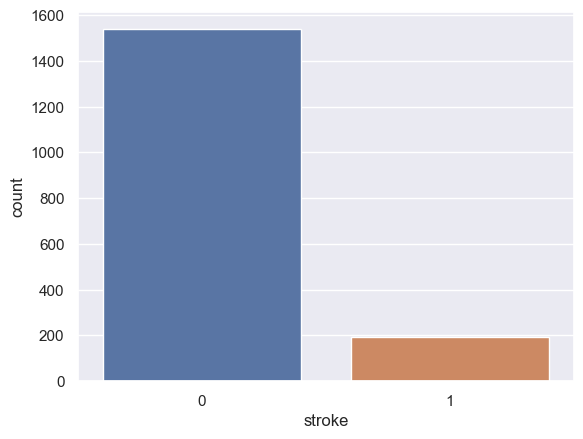

In [19]:
sns.countplot(x = stroke_ytrain)

In [20]:
# oversampling the train dataset using ADASYN
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=1)
xtrain_ada, ytrain_ada = ada.fit_resample(stroke_xtrain,stroke_ytrain)

<Axes: xlabel='stroke', ylabel='count'>

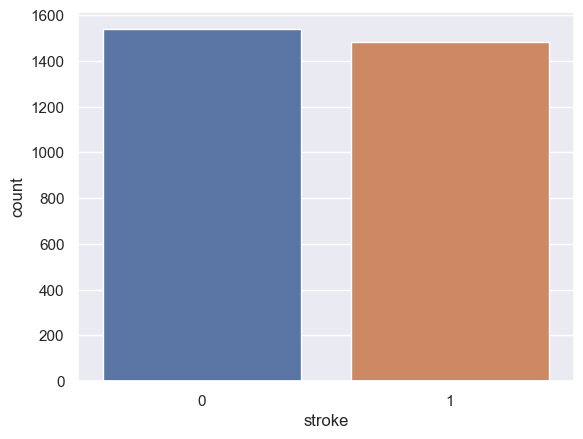

In [21]:
sns.countplot(x = ytrain_ada)

In [22]:
#DECISION TREE

tree_model=DecisionTreeClassifier(random_state=1)
tree_model.fit(xtrain_ada, ytrain_ada)
stroke_ytree_pred=tree_model.predict(xtrain_ada)

In [23]:
#SVM

svm=SVC()
svm.fit(xtrain_ada, ytrain_ada)
stroke_ysvm_pred=svm.predict(xtrain_ada)

In [24]:
#RANDOM FOREST
rf_mod=RandomForestClassifier()
rf_mod.fit(xtrain_ada, ytrain_ada)
stroke_yrf_pred=rf_mod.predict(xtrain_ada)

Decision Tree Classifier Prediction details: 

Accuracy Score  : 1.0
Precision Score : 1.0
Recall Score    : 1.0
f1 Score      : 1.0
Confusion Matrix:
 [[1538    0]
 [   0 1482]]
Classification Matrix :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1538
           1       1.00      1.00      1.00      1482

    accuracy                           1.00      3020
   macro avg       1.00      1.00      1.00      3020
weighted avg       1.00      1.00      1.00      3020



<Axes: >

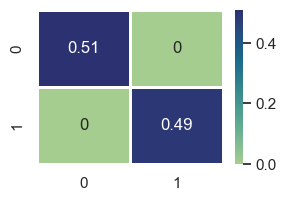

In [25]:
#Accuracy of Decision Tree Classifier

print("Decision Tree Classifier Prediction details: \n")
print("Accuracy Score  :",accuracy_score(ytrain_ada,stroke_ytree_pred))
print("Precision Score :",precision_score(ytrain_ada,stroke_ytree_pred))
print("Recall Score    :",recall_score(ytrain_ada,stroke_ytree_pred))
print("f1 Score      :",f1_score(ytrain_ada,stroke_ytree_pred))
print("Confusion Matrix:\n",confusion_matrix(ytrain_ada,stroke_ytree_pred))
print("Classification Matrix :\n",classification_report(ytrain_ada,stroke_ytree_pred))

tree_revealer = confusion_matrix(ytrain_ada,stroke_ytree_pred)
plt.figure(figsize = (3,2))
sns.set(style = 'darkgrid')
sns.heatmap(tree_revealer/np.sum(tree_revealer), annot=True, cmap='crest', linewidth=1)

SVC Prediction details 

Accuracy Score  : 0.785430463576159
Precision Score : 0.7281181619256017
Recall Score    : 0.898110661268556
  f1 Score      : 0.8042296072507553
Confusion Matrix:
 [[1041  497]
 [ 151 1331]]
Classification Matrix :
               precision    recall  f1-score   support

           0       0.87      0.68      0.76      1538
           1       0.73      0.90      0.80      1482

    accuracy                           0.79      3020
   macro avg       0.80      0.79      0.78      3020
weighted avg       0.80      0.79      0.78      3020



<Axes: >

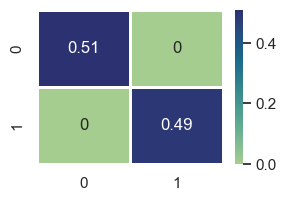

In [26]:
#Accuracy of SVC

print("SVC Prediction details \n")
print("Accuracy Score  :",accuracy_score(ytrain_ada,stroke_ysvm_pred))
print("Precision Score :",precision_score(ytrain_ada,stroke_ysvm_pred))
print("Recall Score    :",recall_score(ytrain_ada,stroke_ysvm_pred))
print("  f1 Score      :",f1_score(ytrain_ada,stroke_ysvm_pred))
print("Confusion Matrix:\n",confusion_matrix(ytrain_ada,stroke_ysvm_pred))
print("Classification Matrix :\n",classification_report(ytrain_ada,stroke_ysvm_pred))

svc_revealer = confusion_matrix(ytrain_ada,stroke_ysvm_pred)
plt.figure(figsize = (3,2))
sns.set(style = 'darkgrid')
sns.heatmap(tree_revealer/np.sum(tree_revealer), annot=True, cmap='crest', linewidth=1)

Random Forest Classifier Prediction details 

Accuracy Score  : 1.0
Precision Score : 1.0
Recall Score    : 1.0
  f1 Score      : 1.0
Confusion Matrix:
 [[1538    0]
 [   0 1482]]
Classification Matrix :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1538
           1       1.00      1.00      1.00      1482

    accuracy                           1.00      3020
   macro avg       1.00      1.00      1.00      3020
weighted avg       1.00      1.00      1.00      3020



<Axes: >

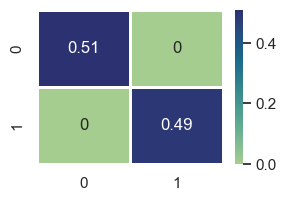

In [27]:
#Accuracy of Random Forest Classifier

print("Random Forest Classifier Prediction details \n")
print("Accuracy Score  :",accuracy_score(ytrain_ada,stroke_yrf_pred))
print("Precision Score :",precision_score(ytrain_ada,stroke_yrf_pred))
print("Recall Score    :",recall_score(ytrain_ada,stroke_yrf_pred))
print("  f1 Score      :",f1_score(ytrain_ada,stroke_yrf_pred))
print("Confusion Matrix:\n",confusion_matrix(ytrain_ada,stroke_yrf_pred))
print("Classification Matrix :\n",classification_report(ytrain_ada,stroke_yrf_pred))

rf_revealer = confusion_matrix(ytrain_ada,stroke_yrf_pred)
plt.figure(figsize = (3,2))
sns.set(style = 'darkgrid')
sns.heatmap(rf_revealer/np.sum(rf_revealer), annot=True, cmap='crest', linewidth=1)

In [28]:
stroke_result=pd.DataFrame({'Model':['Decision Tree Classifier','SVC','Random Forest Classifier'],
                     'Accuracy':[recall_score(stroke_ytree_pred,ytrain_ada)*100,recall_score(stroke_ysvm_pred,ytrain_ada)*100,recall_score(stroke_yrf_pred,ytrain_ada)*100]})

In [29]:
stroke_result

,Model,Accuracy
0,Decision Tree Classifier,100.000000
1,SVC,72.811816
2,Random Forest Classifier,100.000000


<br/>
<br/>
<br/>
<br/>
<br/>
<h3><em>Lungs Data</em></h3>

In [31]:
lung_feature = pd.read_csv('lung_feature.csv')

In [32]:
lung_feature.drop('Unnamed: 0', axis=1, inplace=True)

In [33]:
lung_x = lung_feature.drop('Level', axis = 1)
lung_y = lung_feature.Level

lung_xtrain,lung_xtest,lung_ytrain,lung_ytest = train_test_split(lung_x, lung_y, test_size=0.20, random_state=99)

In [34]:
#DECISION TREE

lung_tree_model=DecisionTreeClassifier(random_state=42, max_depth=6)
lung_tree_model.fit(lung_xtrain,lung_ytrain)
lung_ytree_pred=lung_tree_model.predict(lung_xtest)

In [35]:
#SVM

lung_svm=SVC()
lung_svm.fit(lung_xtrain,lung_ytrain)
lung_ysvm_pred=lung_svm.predict(lung_xtest)

In [36]:
#RANDOM FOREST
lung_rf_model=RandomForestClassifier()
lung_rf_model.fit(lung_xtrain,lung_ytrain)
lung_yrf_pred=lung_rf_model.predict(lung_xtest)

Decision Tree Classifier Prediction details: 

Precision Score (Macro): 1.0
Recall Score (Macro): 1.0
F1 Score (Macro): 1.0
Confusion Matrix:
 [[62  0  0]
 [ 0 81  0]
 [ 0  0 57]]
Classification Matrix :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        57

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



<Axes: >

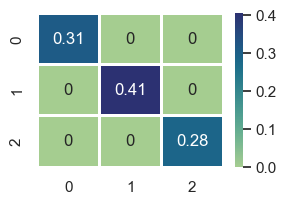

In [37]:
#Accuracy of Decision Tree Classifier

print("Decision Tree Classifier Prediction details: \n")
precision = precision_score(lung_ytest, lung_ytree_pred, average='macro')
recall = recall_score(lung_ytest, lung_ytree_pred, average='macro')
f1 = f1_score(lung_ytest, lung_ytree_pred, average='macro')

# Print the results
print("Precision Score (Macro):", precision)
print("Recall Score (Macro):", recall)
print("F1 Score (Macro):", f1)
print("Confusion Matrix:\n",confusion_matrix(lung_ytest,lung_ytree_pred))
print("Classification Matrix :\n",classification_report(lung_ytest,lung_ytree_pred))


lung_tree_revealer = confusion_matrix(lung_ytest,lung_ytree_pred)
plt.figure(figsize = (3,2))
sns.set(style = 'darkgrid')
sns.heatmap(lung_tree_revealer/np.sum(lung_tree_revealer), annot=True, cmap='crest', linewidth=1)

SVC Prediction details 

Precision Score (Macro) for SVC: 0.9843137254901961
Recall Score (Macro) for SVC: 0.978494623655914
F1 Score (Macro) for SVC: 0.9808567603748326
Confusion Matrix:
 [[58  4  0]
 [ 0 81  0]
 [ 0  0 57]]
Classification Matrix :
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        62
           1       0.95      1.00      0.98        81
           2       1.00      1.00      1.00        57

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



<Axes: >

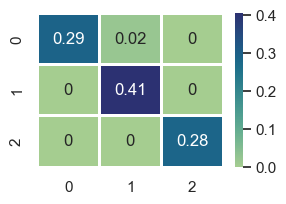

In [38]:
#Accuracy of SVC

print("SVC Prediction details \n")

# Calculate precision, recall, and F1-score for the SVC model
precision = precision_score(lung_ytest, lung_ysvm_pred, average='macro')
recall = recall_score(lung_ytest, lung_ysvm_pred, average='macro')
f1s = f1_score(lung_ytest, lung_ysvm_pred, average='macro')

# Print the results
print("Precision Score (Macro) for SVC:", precision)
print("Recall Score (Macro) for SVC:", recall)
print("F1 Score (Macro) for SVC:", f1s)




print("Confusion Matrix:\n",confusion_matrix(lung_ytest,lung_ysvm_pred))
print("Classification Matrix :\n",classification_report(lung_ytest,lung_ysvm_pred))


lung_svc_revealer = confusion_matrix(lung_ytest,lung_ysvm_pred)
plt.figure(figsize = (3,2))
sns.set(style = 'darkgrid')
sns.heatmap(lung_svc_revealer/np.sum(lung_svc_revealer), annot=True, cmap='crest', linewidth=1)

Random Forest Classifier Prediction details 

Precision Score (Macro) for Random Forest Classifier: 1.0
Recall Score (Macro) for Random Forest Classifier: 1.0
F1 Score (Macro) for Random Forest Classifier: 1.0
Confusion Matrix:
 [[62  0  0]
 [ 0 81  0]
 [ 0  0 57]]
Classification Matrix :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        57

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



<Axes: >

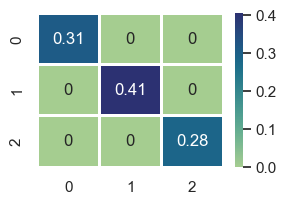

In [39]:
#Accuracy of Random Forest Classifier

print("Random Forest Classifier Prediction details \n")
precisions = precision_score(lung_ytest, lung_yrf_pred, average='macro')
recalls = recall_score(lung_ytest, lung_yrf_pred, average='macro')
f1ss = f1_score(lung_ytest, lung_yrf_pred, average='macro')

# Print the results
print("Precision Score (Macro) for Random Forest Classifier:", precisions)
print("Recall Score (Macro) for Random Forest Classifier:", recalls)
print("F1 Score (Macro) for Random Forest Classifier:", f1ss)



print("Confusion Matrix:\n",confusion_matrix(lung_ytest,lung_yrf_pred))
print("Classification Matrix :\n",classification_report(lung_ytest,lung_yrf_pred))


lung_rf_revealer = confusion_matrix(lung_ytest,lung_yrf_pred)
plt.figure(figsize = (3,2))
sns.set(style = 'darkgrid')
sns.heatmap(lung_rf_revealer/np.sum(lung_rf_revealer), annot=True, cmap='crest', linewidth=1)

In [40]:
# Calculate recall scores for each model using 'macro' average
recall_tree = recall_score(lung_ytest, lung_ytree_pred, average='macro') * 100
recall_svc = recall_score(lung_ytest, lung_ysvm_pred, average='macro') * 100
recall_rf = recall_score(lung_ytest, lung_yrf_pred, average='macro') * 100

# Create a DataFrame to store the results
lung_result = pd.DataFrame({
    'Model': ['Decision Tree Classifier', 'SVC', 'Random Forest Classifier'],
    'Recall (Percentage)': [recall_tree, recall_svc, recall_rf]
})

# Print or display the DataFrame
display(lung_result)


,Model,Recall (Percentage)
0,Decision Tree Classifier,100.000000
1,SVC,97.849462
2,Random Forest Classifier,100.000000


In [41]:
import joblib


#save heart model
joblib.dump(rf_model, 'heart_model.pkl')


#save stroke model
joblib.dump(rf_mod, 'stroke_model.pkl')


#save lungs model
joblib.dump(lung_rf_model,'lung_model.pkl')

['lung_model.pkl']